In [93]:
import json 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [99]:
with open("balancedFIR25_res.json") as f:
    balancedRes = json.load(f)

with open("regularFIR25_res.json") as f:
    regularRes = json.load(f)

balancedSteps = np.array(balancedRes["steps"])
balancedComms = np.array(balancedRes["communications"])

regularSteps = np.array(regularRes["steps"])
regularComms = np.array(regularRes["communications"])

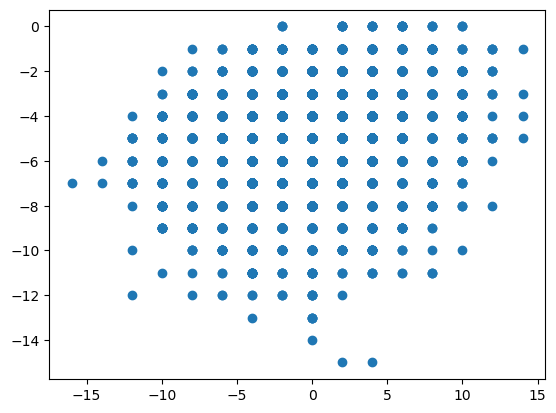

In [100]:
plt.scatter(balancedComms-regularComms, balancedSteps - regularSteps)

(array([1.000e+00, 1.400e+01, 5.500e+01, 1.660e+02, 3.150e+02, 6.110e+02,
        8.710e+02, 1.092e+03, 1.218e+03, 1.252e+03, 1.171e+03, 9.910e+02,
        6.920e+02, 5.140e+02, 4.250e+02, 2.470e+02, 1.710e+02, 9.400e+01,
        4.800e+01, 2.600e+01, 1.300e+01, 3.000e+00, 5.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00]),
 array([49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5,
        60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5,
        71.5, 72.5, 73.5, 74.5, 75.5]),
 <BarContainer object of 26 artists>)

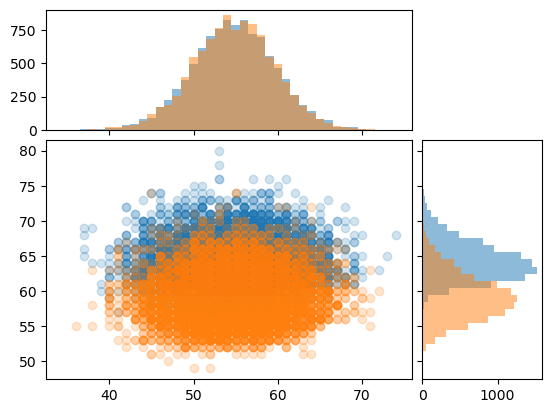

In [108]:
fig, ax = plt.subplots()

ax.scatter(regularComms, regularSteps, alpha=0.2)
ax.scatter(balancedComms, balancedSteps, alpha=0.2)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

ax_histx.hist(regularComms, np.linspace(34.5, 72.5, 39), alpha=0.5)
ax_histx.hist(balancedComms, np.linspace(34.5, 72.5, 39), alpha=0.5)

ax_histy.hist(regularSteps, np.linspace(49.5, 75.5, 27), alpha=0.5, orientation='horizontal')
ax_histy.hist(balancedSteps, np.linspace(49.5, 75.5, 27), alpha=0.5, orientation='horizontal')



(array([1.000e+00, 1.400e+01, 5.500e+01, 1.660e+02, 3.150e+02, 6.110e+02,
        8.710e+02, 1.092e+03, 1.218e+03, 1.252e+03, 1.171e+03, 9.910e+02,
        6.920e+02, 5.140e+02, 4.250e+02, 2.470e+02, 1.710e+02, 9.400e+01,
        4.800e+01, 2.600e+01, 1.300e+01, 3.000e+00, 5.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00]),
 array([49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5, 56.5, 57.5, 58.5, 59.5,
        60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5, 67.5, 68.5, 69.5, 70.5,
        71.5, 72.5, 73.5, 74.5, 75.5]),
 <BarContainer object of 26 artists>)

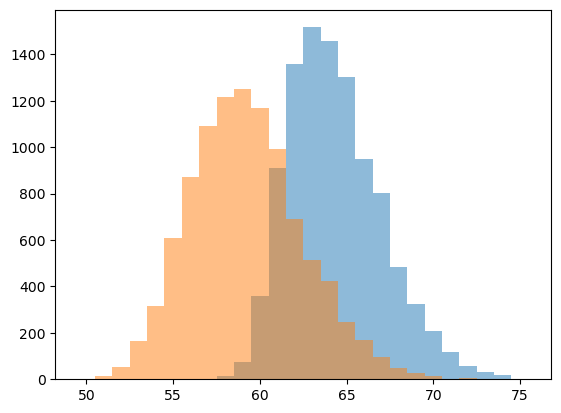

In [102]:
plt.hist(regularSteps, np.linspace(49.5, 75.5, 27), alpha=0.5)
plt.hist(balancedSteps, np.linspace(49.5, 75.5, 27), alpha=0.5)

(array([  0.,   0.,   2.,   3.,   1.,   7.,  14.,  25.,  41.,  87., 117.,
        169., 222., 321., 390., 531., 613., 693., 702., 773., 871., 809.,
        765., 621., 582., 431., 378., 309., 191., 129.,  97.,  53.,  25.,
         14.,   7.,   3.,   0.,   3.]),
 array([34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5, 44.5,
        45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5, 55.5,
        56.5, 57.5, 58.5, 59.5, 60.5, 61.5, 62.5, 63.5, 64.5, 65.5, 66.5,
        67.5, 68.5, 69.5, 70.5, 71.5, 72.5]),
 <BarContainer object of 38 artists>)

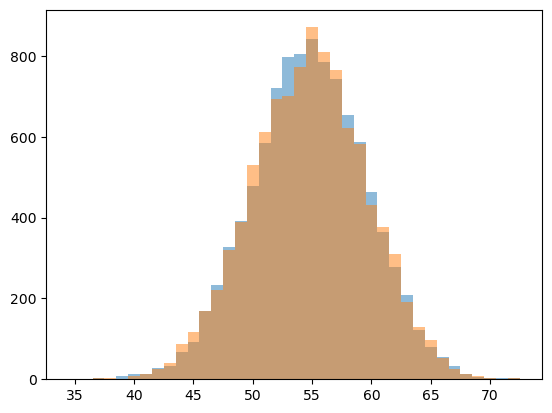

In [91]:
plt.hist(regularComms, np.linspace(34.5, 72.5, 39), alpha=0.5)
plt.hist(balancedComms, np.linspace(34.5, 72.5, 39), alpha=0.5)

(array([1.000e+00, 5.000e+00, 1.500e+01, 4.000e+01, 1.130e+02, 2.840e+02,
        6.480e+02, 1.150e+03, 1.775e+03, 2.057e+03, 1.831e+03, 1.277e+03,
        6.100e+02, 1.610e+02, 3.100e+01]),
 array([-14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,  -6.5,
         -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,   0.5]),
 <BarContainer object of 15 artists>)

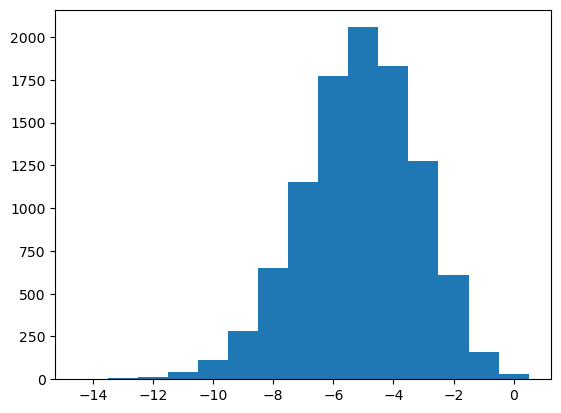

In [107]:
plt.hist(balancedSteps - regularSteps, np.linspace(-14.5, 0.5, 16))

In [79]:
def count2d(xs, ys):
    idxx = set(xs)
    idxy = set(ys)
    
    ret = []

    xys = np.dstack([xs, ys])[0]

    for x in idxx:
        for y in idxy:
            p = np.array([x, y])
            c = np.sum(np.all((p == xys), axis=1))
            ret.append([x, y, c])
    return np.array(ret)


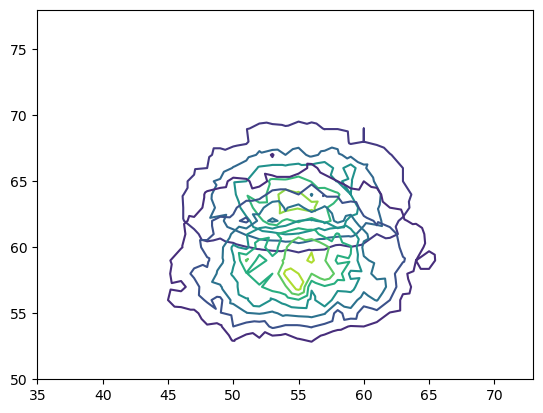

In [80]:
countRegular = count2d(regularComms, regularSteps)
countBalanced = count2d(balancedComms, balancedSteps)

plt.tricontour(countRegular[:, 0], countRegular[:, 1], countRegular[:, 2], levels=5)
plt.tricontour(countBalanced[:, 0], countBalanced[:, 1], countBalanced[:, 2])

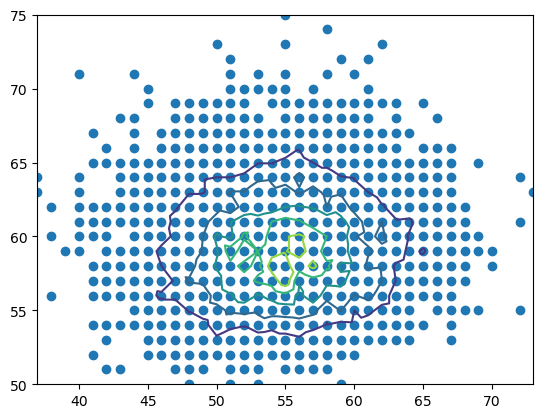

In [81]:
plt.scatter(countBalanced[:, 0][countBalanced[:, 2]!=0], countBalanced[:, 1][countBalanced[:, 2]!=0])
plt.tricontour(countBalanced[:, 0], countBalanced[:, 1], countBalanced[:, 2], levels=5)

In [52]:
np.sum(countBalanced[:, 2])

600000.0